In [1]:
#Initialisation du document
import numpy as np 
from matplotlib import pyplot as plt

Dans un premier temps on initialise les constantes nécéssaires à l'étude du système ainsi que la fonction $\Gamma$ énoncé précédemment, on rappelle:
$$\Gamma : (x,y,z) \in \mathbb{R}^3 \mapsto (\sigma(y-x), \rho x-y-xz, xy-\beta z)$$

In [2]:
sigma = 10
rho = 28
beta = 8/3

def Lorenz(t,X:np.ndarray(3)):
    Xout = np.zeros(3)
    Xout[0] = sigma*(X[1] - X[0])
    Xout[1] = rho*X[0] - X[1] - X[0]*X[2]
    Xout[2] = X[0]*X[1] - beta*X[2]
    return Xout

On implémente une fonction qui calcule une étape du shéma de Runge-Kutta d'ordre 4.

In [3]:
def RK4(tn,h,Y:np.array,f):
    k1 = f(tn,Y)
    k2 = f(tn + (h/2),Y + (h/2)*k1)
    k3 = f(tn + (h/2),Y + (h/2)*k2)
    k4 = f(tn + h, Y + h*k3)
    Yout = Y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return np.array(Yout)

On initialise les valeurs de durée temporelle d'aproximation ainsi que la duré entre deux points, ainsi que les conditions initiales:
$$T=30\\ \Delta t = 10^{-2}\\ x(t=0)= x_0 = 6\\ y(t=0)=y_0 = 4 \\ z(t=0)= z_0 =2$$

In [4]:
T = 30
h = .01
x0,y0,z0=6,4,2

On procède maintenant a l'aproximation de la solution sur $\frac{T}{\Delta t}$ intervales, de $t=0$ à $t=T$.

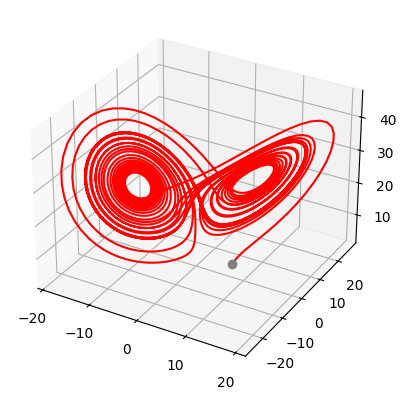

In [5]:
nbInterv = int(T/h)
Y = np.zeros((nbInterv,3))
Y[0] = [x0,y0,z0]

for i in range(1,nbInterv):
    Yout = RK4(i*h,h,Y[i-1],Lorenz)
    Y[i] = Yout

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(Y[:,0],Y[:,1],Y[:,2], color = 'red') #Graphe de la solution aprochée
ax.plot(6,4,2,color = 'grey' , marker = 'o') #pts de départ
plt.show()

On répète la même opération avec une légère perturbation dans les conditions initiales $\varepsilon = 0,1$. On note ces conditions initiales:$$x(t=0)= x_{0 + \varepsilon} = x_0 + \varepsilon\\ y(t=0)=y_{0 + \varepsilon}= y_0 + \varepsilon \\ z(t=0)= z_{0 + \varepsilon}= = z_0 + \varepsilon$$

In [6]:
epsilon = .1

Y_e = np.zeros((nbInterv,3))
Y_e[0] = Y[0] + epsilon

for i in range(1,nbInterv):
    Yout_e = RK4(i*h,h,Y_e[i-1],Lorenz)
    Y_e[i] = Yout_e

On introduit la norme euclidienne de $\mathbb{R}^3$ pour afin de d'étudier les distances entre les solutions de conditions initiales différentes:$$\mathcal{N} : (x,y,z) \in \mathbb{R}^3 \mapsto \|x\|_2 = \sqrt{x^2 + y^2 + z^2} \in \mathbb{R}_+$$

In [7]:
def NEuclid(X:np.array):
    N = 0
    for i in X:
        N += i**2
    return np.sqrt(N)

On trace maintenant la distance entre les solutions de conditions initiales $(x_0,y_0,z_0)$ et $(x_{0 + \varepsilon},y_{0 + \varepsilon},z_{0 + \varepsilon})$

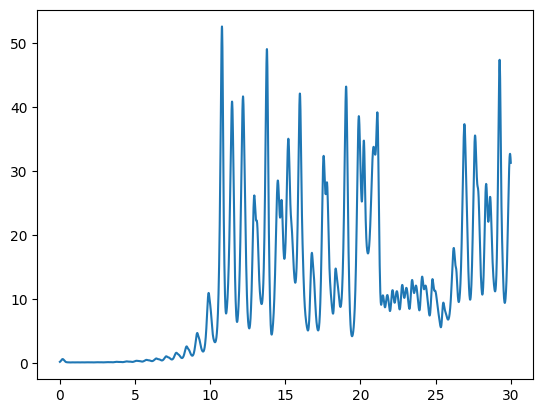

In [8]:
t = np.linspace(0,T,nbInterv)
delta = np.zeros(nbInterv)
for i in range(nbInterv):
    delta[i] = NEuclid(Y[i] - Y_e[i])

plt.plot(t,delta)
plt.show()

On remarque que la solution a tendance a s'éloigner sur une courte échelle de temps avec d'inportante variation de distance. On se propose alors d'étudier se phenomène sur une periode de temps plus longue avec un plus faible echantillonage de la de l'intervalle de temps total

On choisis alors $T = 10^4$ et $h=0.1$

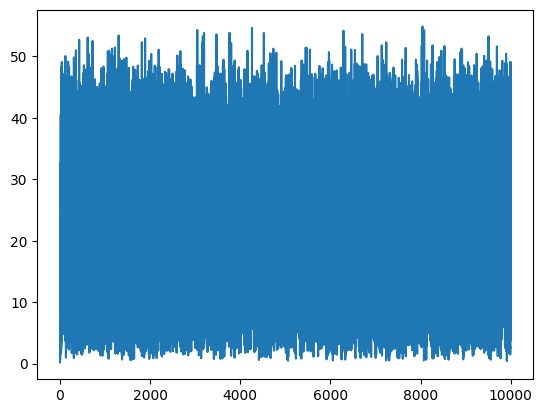

In [9]:
T = 10000
h = .1

nbInterv = int(T/h)

Y = np.zeros((nbInterv,3))
Y[0] = [x0,y0,z0]

Y_e = np.zeros((nbInterv,3))
Y_e[0] = Y[0] + epsilon

delta = np.zeros(nbInterv)
delta[0] = np.sqrt(3)*epsilon

for i in range(1,nbInterv):
    Yout = RK4(i*h,h,Y[i-1],Lorenz)
    Y[i] = Yout
    Yout_e = RK4(i*h,h,Y_e[i-1],Lorenz)
    Y_e[i] = Yout_e

for i in range(nbInterv):
    delta[i] = NEuclid(Y[i] - Y_e[i])

t = np.linspace(0,T,nbInterv)   
plt.plot(t,delta)
plt.show()